In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR #회귀
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
boston = load_boston()
x, y = boston.data, boston.target

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [12]:
# 스케일러
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
# train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [19]:
x_train.shape

(354, 13)

In [20]:
y_train.shape

(354,)

In [21]:
x_test.shape

(152, 13)

In [22]:
y_test.shape

(152,)

In [23]:
# svc 모델 정의, 학습
# 비선형 - 가우시안, gamma='auto'
svr = SVR(kernel='rbf', gamma='auto')
svr.fit(x_train, y_train)

SVR(gamma='auto')

In [24]:
# svr 모델 스코어 뽑기
scores = svr.score(x_train, y_train)
print('R-squared:', scores)

R-squared: 0.38714677444380763


In [26]:
#(모델, 학습하는 데이터, 데이터의 정답값, cv=?)
cv_scores = cross_val_score(svr, x_scaled, y, cv=5)
print('CV mean score :', cv_scores.mean()) #정확도: 15%

CV mean score : 0.15191153352927586


In [27]:
pred = svr.predict(x_test) #예측값 정의

mse = mean_squared_error(y_test, pred)
print('MSE :',mse)

#분류보다 회귀에서 정확도 더 안좋음

MSE : 55.32889250645819


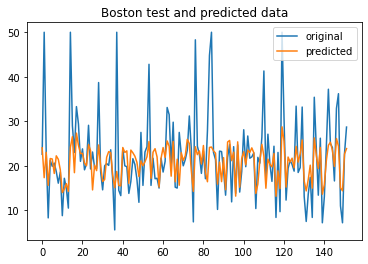

In [28]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('Boston test and predicted data')
plt.legend()
plt.show()

In [29]:
svm = SVR(kernel='rbf')
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

In [30]:
grid_svm = GridSearchCV(svm, param_grid=parameters, cv=5)
grid_svm.fit(x_scaled, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]})

In [31]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['평균 score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='평균 score', ascending=False)

,C,gamma,평균 score
58,100.0,0.10,0.613716
50,50.0,0.10,0.610651
42,25.0,0.10,0.573947
34,10.0,0.10,0.518897
57,100.0,0.01,0.504687
...,...,...,...
46,25.0,50.00,-0.607953
39,10.0,100.00,-0.620004
55,50.0,100.00,-0.689042
63,100.0,100.00,-0.689042


### 최적의 모델

In [32]:
svr = SVR(kernel='rbf', gamma=0.1, C=100)
svr.fit(x_train, y_train)

SVR(C=100, gamma=0.1)

In [33]:
cv_score = cross_val_score(svr, x_scaled, y, cv=5)
print('CV mean score:', cv_score.mean()) #하이퍼파라미터 조절로 61%로 상승

CV mean score: 0.6137158223739019


In [34]:
pred = svr.predict(x_test)

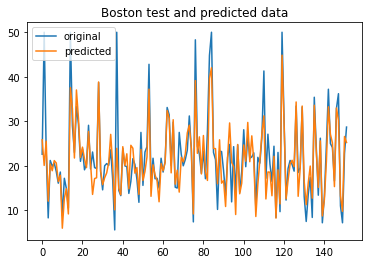

In [35]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('Boston test and predicted data')
plt.legend()
plt.show()